## Network

My projects in the university are network science related. I made the some of the next functions before, just copy-pasted now.
`

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from collections import Counter

FONT_SIZE = 15

In [3]:
def degree_dist(graph,direction=None):
    ''' Return the degree distribution of graph.
        Parameters
        ----------
        graph : networkx object
        
        direction: None or string
        
        By default the degree of a node equals to the number of undirected
        edges of a the node.
        
        If direction = in : We use the number of incoming degrees, as degree.
        
        If direction = out : We use the number of outgoing degrees, as degree.
        
        Returns
        -------
        degdist : dictionary, keys are degree, values are the possibilities of a given degree .
            
    '''
    nr_nodes=graph.number_of_nodes()
    
    if direction == None:
        degdist = Counter(sorted([d for n,d in graph.degree()],reverse=False))
    elif direction == 'out':
        degdist = Counter(sorted([d for n,d in graph.out_degree()],reverse=False))
    elif direction == 'in':
        degdist = Counter(sorted([d for n,d in graph.in_degree()],reverse=False))
    else:
        print('Direction format is not correct.')
    
    degdist = {k: v / nr_nodes  for k, v in degdist.items()}
    return degdist


def plot_degdist(G):
    ddist_G = degree_dist(G)
    plt.plot(list(ddist_G.keys()),list(ddist_G.values()),'b.',label='Data')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Degree distribution',fontsize=FONT_SIZE)
    plt.xlabel('k',fontsize=FONT_SIZE)
    plt.ylabel('$p_k$',fontsize=FONT_SIZE)

def swap_n_edges_and_plot_ddist(G,nr_rewirings):
    G = G.copy()
    count_rewirings = int(0)
    
    while count_rewirings < nr_rewirings:
        rand_edge_id=np.random.randint(0,G.number_of_edges())
        
        link_list = list(G.edges())
        
        s1 = link_list[rand_edge_id][0]
        t1 = link_list[rand_edge_id][1]
        
        G.remove_edge(s1,t1)
        
        rand_new_nodes_id=np.random.randint(0,G.number_of_nodes(),2)
        
        s2 = list(G.nodes())[rand_new_nodes_id[0]]
        t2 = list(G.nodes())[rand_new_nodes_id[1]]
        
        if (s2,t2) not in link_list: # don't want multigraph
            G.add_edge(s2,t2)
            count_rewirings+=1
        
    
    plot_degdist(G)
        
            

1. Create a random network (with N>10.000 nodes) using the Barabasi-Albert model, and create a meaningful plot of the degree distribution!
Once the network is ready, gradually swap edges between nodes and track the change of the network topology by looking at the changes in the degree distribution!

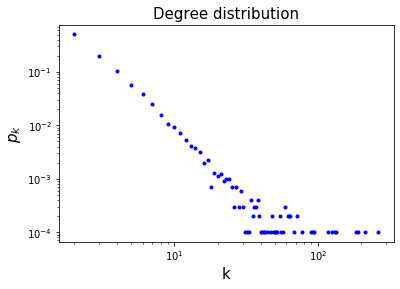

In [4]:
N = 10000
m = 2
network_BA = nx.barabasi_albert_graph(N,m)
plot_degdist(network_BA)

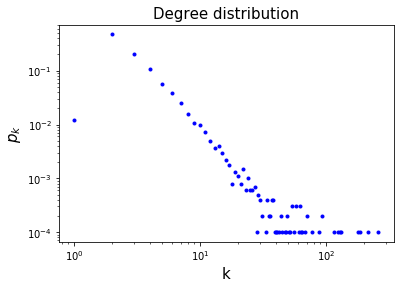

In [5]:
swap_n_edges_and_plot_ddist(network_BA,nr_rewirings=300)

2. Construct a network from referencing webpages! E.g. choose webpage of the Dept. of Complex Systems as the first node of the network and create new nodes and links from the "href" references! Make a visualisation of the growing network as the diameter of the network increases! (Diameter of a graph is the maximal distance between the nodes of the network. The distance between two nodes is measured by the number of steps along the shortest path connecting the node pair.

In [3]:
from bs4 import BeautifulSoup
import urllib.request, urllib.error
import urllib3



In [45]:
home_link = "https://complex.elte.hu/"
depth = range(0,5)

def get_href_of_page(url):
    link_list = []
    if 'https://' in url:
        try:
            html_page = urllib.request.urlopen(url)
        except urllib.error.HTTPError:
            pass
        else:
            soup = BeautifulSoup(html_page, "html.parser")
            for link in soup.findAll('a'):
                if 'https://' in str(link.get('href')):
                    link_list.append(str(link.get('href')))

    return link_list


def get_elist_of_href_in_n_depth(url_main,depth=5):
    source = []
    target = []
    
    current_layer = []
    
    for n in range(depth):
        print('Process:',n+1)
        if n == 0:
            ref_links = get_href_of_page(url_main)

            current_layer = ref_links
            for l in ref_links:
                source.append(url_main)
                target.append(l)
        else:
            tmp_current_layer = []
            for c_url in current_layer:
#                 print(c_url)
                ref_links = get_href_of_page(c_url)
                tmp_current_layer += ref_links
                for l in ref_links:
                    source.append(c_url)
                    target.append(l)
            current_layer = tmp_current_layer.copy()
            tmp_current_layer.clear()
    
    return pd.DataFrame({'source':source,'target':target})

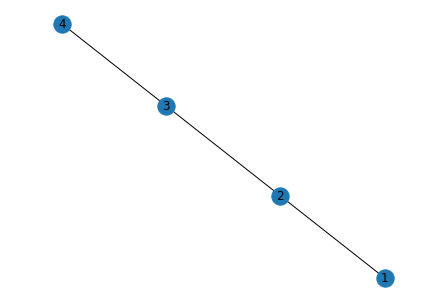

In [49]:
tmp_df = pd.DataFrame({'source':[1,2,3],'target':[2,3,4]})
tmp_n = nx.from_pandas_edgelist(tmp_df)
nx.draw(tmp_n,with_labels=True)

In [ ]:
nx.graph(df)

In [52]:
networks_depth = []
depth_var = 4
for d in range(depth_var):
    tmp_elist = get_elist_of_href_in_n_depth(home_link,depth=d)
    networks_depth.append(nx.from_pandas_edgelist(tmp_elist,create_using=nx.Graph()))
    print('nr nodes: ',networks_depth[d].number_of_nodes(),' nr edges: ',networks_depth[d].number_of_edges())

nr nodes:  0  nr edges:  0
Process: 1
nr nodes:  4  nr edges:  3
Process: 1
Process: 2
nr nodes:  37  nr edges:  37
Process: 1
Process: 2
Process: 3
nr nodes:  497  nr edges:  992


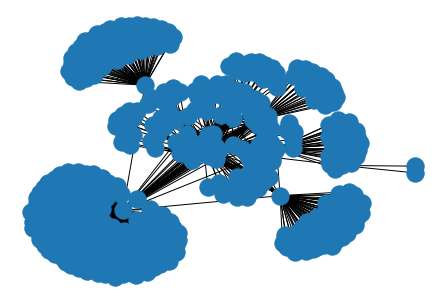

In [58]:
nx.draw(networks_depth[3])

Text(0, 0.5, 'Diameter')

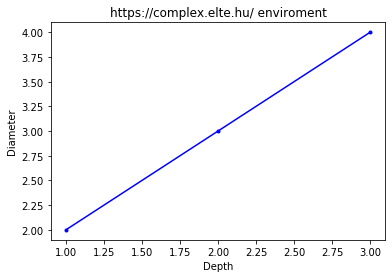

In [62]:
diameter_of_network = []
depths = []
for i in range(1,len(networks_depth)):
    depths.append(i)
    diameter_of_network.append(nx.diameter(networks_depth[i]))
plt.plot(depths,diameter_of_network,'b.-',label='Data')
plt.title(home_link+' enviroment')
plt.xlabel('Depth')
plt.ylabel('Diameter')


3. During reconnecting (swapping) links between nodes, usually we need a constant quantity, which does not change during the swapping of links. E.g. one can fix the degree distribution by setting a constraint at each node, how many incoming/outgoing connection it must have. Create small networks (N<50 nodes), which are randomized with swapping the links constraining the degrees of each node. By creating a visual representation of the network track the changes of swapping of the links! Show some examples, where this type of randomization does not change the topology of the network at all.

In [6]:
def Degree_preserving_randomisation(graph,nr_rewirings):

    graph_copy=graph.copy()
    count_rewirings=int(0)
    
    while count_rewirings < nr_rewirings:
        
        rand_edge_ids=np.random.randint(0,graph.number_of_edges(),2)
        
        if rand_edge_ids[0] != rand_edge_ids[1]:
            
            link_list=list(graph_copy.edges())
            
            s1,t1=link_list[rand_edge_ids[0]][0],link_list[rand_edge_ids[0]][1]
            
            s2,t2=link_list[rand_edge_ids[1]][0],link_list[rand_edge_ids[1]][1]
            # if nodes are different and the links are not in the graph already:
            if len(set([s1,t1,s2,t2])) == 4 and not graph_copy.has_edge(s1,t2) and not graph_copy.has_edge(s2,t1):
                #print("Collect done")
                graph_copy.remove_edge(s1,t1)
                graph_copy.remove_edge(s2,t2)
                
                graph_copy.add_edge(s1,t2)
                graph_copy.add_edge(s2,t1)
                
                count_rewirings += 1

    
    return graph_copy


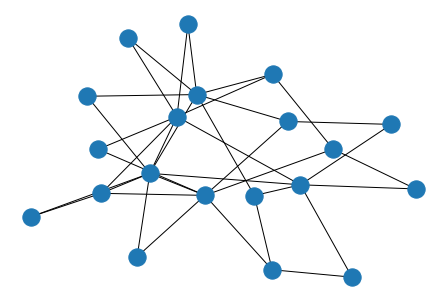

In [7]:
N2 = 20
m2 = 2

network_small = nx.barabasi_albert_graph(N2,m2)
nr_swaps = network_small.number_of_edges()
nx.draw(network_small)

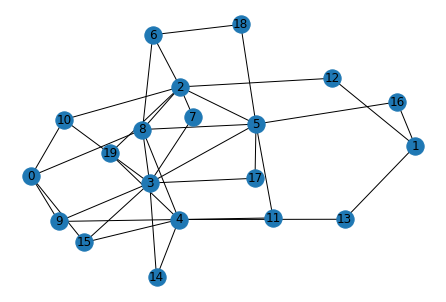

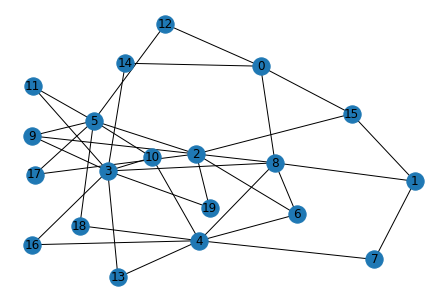

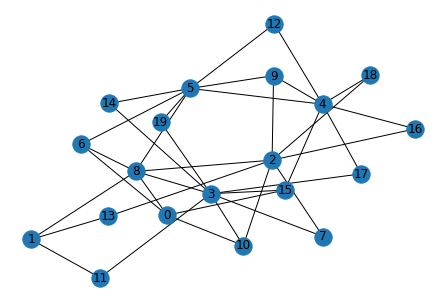

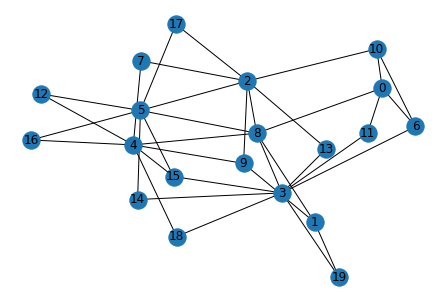

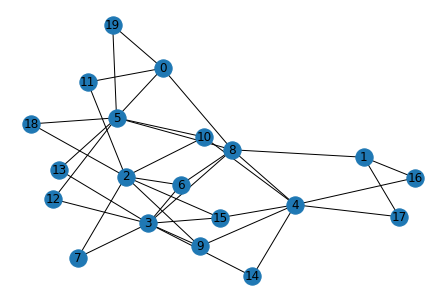

In [9]:
repeats = 5
for r in range(repeats):
    network_small = Degree_preserving_randomisation(network_small,nr_rewirings=nr_swaps)
    nx.draw(network_small,with_labels=True)
    plt.show()